## Regularization
Regularization is a technique to reduce one of most common issues in machine learning named Overfitting. It makes slight deviation to the learning pattern of a machine learning algorithm so that it does not follow "exactly" the training data. In classical machine learning algorithms, Regularization penalize the coefficients and in deep learning networks it penalize the metrices weight of the nodes. 


To reduce the overfitting we can just simply reduce the number of parameters to decrease the variance. But in this notebook, we will keep all the parameters and implement various regularization techniques to reduce the overfitting. 

#### Dropout
Dropout is a technique to remove a random number of activated neurons from a neural network layer. It can be implemented on every layer (also on input layer) separately and independantly. Dropout dedcuts the neurons randomly for each iteration. So this randomness makes the model to act as an "Ensembled algorithm".

#### Batch Normalization
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to any layer for each mini-batch. During the training of a NN, the weights are continuously updating and it causes covarince shifting. We also lost the advantage of using standardized data just after the first layer because the data is no longer standardized after one layer with activation. In this case we can normalize the data again before feeding to next layer. Batch normalization is not directly a regularizaiton parameter rather it slightly helps to reduce overfitting when using along with Dropout. But some researchers also suggested not to used Dropout while using Batch normalization. 

Normally the Batch normalization is used after a layer with activation and before a Dropout layer. 

#### Data Augmentation
Increasing the amount of training data is likable approach to reduce overfitting. Data augmentation is a technique to create more training data by shifting, zooming, cropping, changing the brightness, flipping or toggling the images (or training data). 

#### Early Stopping
Early stopping means interrupting the training process at that point where test set error stops ( or even start to increase) improving/decreasing along with training set error. 

#### L1 & L2 Regularization
These are techniques to add penalty to the calculated loss function and add a small amount of bias. This small change in bias results a big drop in variance hence reduce the overfitting. These two regularization creates two regression lines which have lower slope than the original line. Lower slope means that the prediction or dependant variable is "less" sensetive to the input or independant variables.


##### L1 Regularization 
It adds “absolute value of magnitude” of coefficient as penalty term to the loss function. The model uses L1 regularization is called as or Lasso Regression.

##### L2 Regularization
It adds “squared value of magnitude” of coefficient as penalty term to the loss function. The model uses L2 regularization is called as or Ridge Regression.

##### Choosing between L1 & L2

- Lasso Regression or L1 regularization are used when there is a large number of useless features.


- Ridge Regression or L2 regularization works every well when there less number of samples but big number of features. So L1 is used when there features are useful.


- In this notebook we will implement all of the techniques described above and see the effect of them on a Neural Network model.

- For experiment we will use the chinese mnist dataset (downloaded from Kaggle)

# Starting Heart Failure Project

In [150]:
# Importing the important libraries and modules for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

In [151]:
# Loading the dataset

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

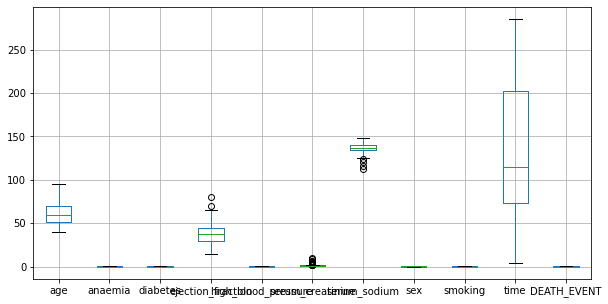

In [154]:
# The mean value of 'platelets' and 'creatinine_phosphokinase' features are very high compared to other features
# So lets plot a box plot by dropping those columns

df.drop(['platelets', 'creatinine_phosphokinase'], axis = 1).boxplot(figsize=(10,5))

In [155]:
# Still there are few features which have relatively high values than others (e.g. 'time')
# So we have to do standard scaling
# But first separate the independant and dependant variables


X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [156]:
# Now scaling the independant variables

col_names = list(X.columns)
st_scaler = preprocessing.StandardScaler()
X_df = st_scaler.fit_transform(X)
X_st = pd.DataFrame(X_df, columns = col_names)
X_st.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


<AxesSubplot:>

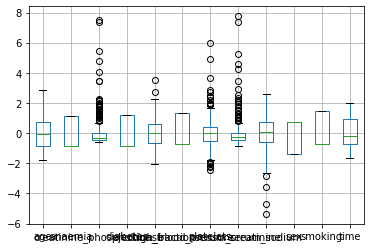

In [157]:
# Lets see how it looks after the scaling

X_st.boxplot()

In [158]:
# Now the dataset values are prepared to be fed into a neural network
# Let's split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size = 0.25, random_state = 101)
X_train.shape, y_train.shape, X_test.shape

((224, 12), (224,), (75, 12))

In [186]:
# Now creating a simple neural network

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu')(input1)
hidden2 = Dense(50, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model_func = Model(inputs=input1, outputs=output)

model_func.summary()

Model: "functional_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_111 (Dense)            (None, 100)               1300      
_________________________________________________________________
dense_112 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [187]:
# Compiling and training the network

model_func.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy']
                   )

history = model_func.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 0.6725 - accuracy: 0.5625 - val_loss: 0.6037 - val_accuracy: 0.7467
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.7277 - val_loss: 0.5390 - val_accuracy: 0.8000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7545 - val_loss: 0.4904 - val_accuracy: 0.7733
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.8125 - val_loss: 0.4586 - val_accuracy: 0.8133
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.8348 - val_loss: 0.4377 - val_accuracy: 0.8133
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8482 - val_loss: 0.4194 - val_accuracy: 0.8400
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8616 - val_loss: 0.4102 - val_accuracy: 0.8400
Epoch 8/50
7/7 [=================

In [188]:
# Let's check the last training and validation accuracy

train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy*100))
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


train_accuracy: 97.77%

val_accuracy: 81.33%


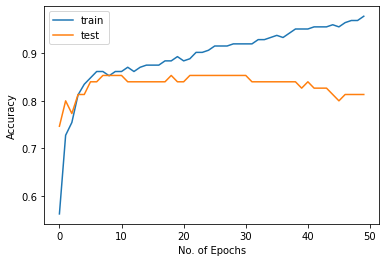

In [189]:
# Now plotting the training and validation accuracy during training

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')

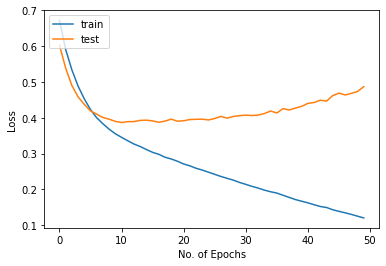

In [190]:
# And then plotting the training and validation loss during training

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')

From the above figures we can see that, after around 10 epochs the validation accuracy does not change while the training accuracy continued to rise. And the validation loss also goes up after around 10 epochs whereas training loss continued to decrease. 

So it is clear that our model is overfitted which we wanted for our experiments. Now let's apply different regularization techniques one by one which are described above.

## DROPOUT

In [182]:
# Adding dropout layers in the previous network

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu')(input1)
hidden11 = Dropout(0.3)(hidden1)
hidden2 = Dense(50, activation='relu')(hidden11)
hidden22 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(hidden22)
model_func_drp = Model(inputs=input1, outputs=output)

model_func_drp.summary()

Model: "functional_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_108 (Dense)            (None, 100)               1300      
_________________________________________________________________
dropout_51 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_52 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
___________________________________________________

In [183]:
model_func_drp.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy']
                   )

history_drp = model_func_drp.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
7/7 [==============================] - 0s 26ms/step - loss: 0.7000 - accuracy: 0.4955 - val_loss: 0.6465 - val_accuracy: 0.7200
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.6339 - val_loss: 0.5870 - val_accuracy: 0.8000
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7188 - val_loss: 0.5427 - val_accuracy: 0.7600
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5736 - accuracy: 0.7054 - val_loss: 0.5084 - val_accuracy: 0.7600
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.7321 - val_loss: 0.4794 - val_accuracy: 0.7733
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.7321 - val_loss: 0.4540 - val_accuracy: 0.7867
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7589 - val_loss: 0.4348 - val_accuracy: 0.8400
Epoch 8/50
7/7 [=================

In [184]:
# Let's check the last training and validation accuracy after adding the dropout layer

train_accuracy_drp = history_drp.history['accuracy'][-1]
val_accuracy_drp = history_drp.history['val_accuracy'][-1]
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy_drp*100))
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy_drp*100))


train_accuracy: 90.18%

val_accuracy: 84.00%


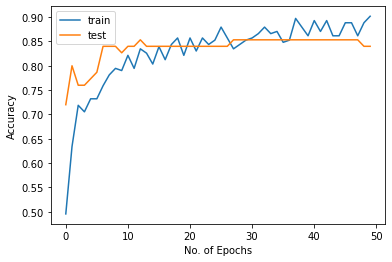

In [185]:
plt.plot(history_drp.history['accuracy'])
plt.plot(history_drp.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')

In this case, Dropout layer did not improved the validation accuracy drastically. But one thing is noticable that the training accuracy fall down. It means it is less overfitted than earlier. 

## Batch normalization

In [191]:
# Now we will define the number of samples in each batches during training

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu')(input1)
hidden11 = Dropout(0.3)(hidden1)
hidden2 = Dense(50, activation='relu')(hidden11)
hidden22 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(hidden22)
model_func_drp_batch = Model(inputs=input1, outputs=output)

model_func_drp_batch.summary()

Model: "functional_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_114 (Dense)            (None, 100)               1300      
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_54 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
___________________________________________________

In [192]:
model_func_drp_batch.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy'])

history_drp_batch = model_func_drp_batch.fit(X_train, y_train, batch_size = 15, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.6496 - accuracy: 0.6562 - val_loss: 0.5804 - val_accuracy: 0.7467
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7188 - val_loss: 0.5093 - val_accuracy: 0.7600
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7411 - val_loss: 0.4673 - val_accuracy: 0.8533
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7946 - val_loss: 0.4382 - val_accuracy: 0.8400
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8080 - val_loss: 0.4138 - val_accuracy: 0.8133
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8080 - val_loss: 0.3868 - val_accuracy: 0.8133
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7991 - val_loss: 0.3832 - val_accuracy: 0.8400
Epoch 8/50
15/15 [=

In [193]:
# Let's check the last training and validation accuracy after defining the batches

train_accuracy_drp_batch = history_drp_batch.history['accuracy'][-1]
val_accuracy_drp_batch = history_drp_batch.history['val_accuracy'][-1]
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy_drp_batch*100))
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy_drp_batch*100))


train_accuracy: 90.18%

val_accuracy: 81.33%


There is no noticable improvement in the accuracies. The dataset used here is not big enough to have significant result of batch training.

# Data augmentation

Before augmenting the Data, it is very important to understand which types of variations are in the data that does not affect its class. 

Here are two examples where we can take the advantages of augmentation
- Task of polyphonic pitch tracking in music information retrieval process: In this task, the timbre of the audio (e.g. frequency response) can vary without affecting the correct transcription; this is an invariance assumption. 
- Finding object in an image: In this task, rotation or flip does not change the fact the change what object is shown in the image. So it is also invariant to the augmentation. 

But if we augment when the result is sensetive to the change of the data, then data augmentation can lead to worse result. For example, in our case we have information of the patient's different physical condition's parameters. Changing these data, also can change the target variable and the model will not work properly.


So we will continue without augmenting our dataset.

# Early Stopping

In [195]:
# Network structure is same as previous

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu')(input1)
hidden11 = Dropout(0.3)(hidden1)
hidden2 = Dense(50, activation='relu')(hidden11)
hidden22 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(hidden22)
model_func_drp_batch_cb = Model(inputs=input1, outputs=output)

model_func_drp_batch_cb.summary()

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_117 (Dense)            (None, 100)               1300      
_________________________________________________________________
dropout_55 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_56 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
___________________________________________________

In [196]:
# We will add another parameter named 'callback' which will stop the training if there is decrease in validation accuracy. 
# It will wait two iterations before stopping the training.

callbacks = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

model_func_drp_batch_cb.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy']
                   )

history_drp_batch_cb = model_func_drp_batch_cb.fit(X_train, y_train, batch_size = 15, epochs=50, callbacks=callbacks,
                                                   validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.6988 - accuracy: 0.6027 - val_loss: 0.5944 - val_accuracy: 0.7200
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7188 - val_loss: 0.5395 - val_accuracy: 0.7600
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.7366 - val_loss: 0.5001 - val_accuracy: 0.8267
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7857 - val_loss: 0.4619 - val_accuracy: 0.8133
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8036 - val_loss: 0.4330 - val_accuracy: 0.8133
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7902 - val_loss: 0.4095 - val_accuracy: 0.8000
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7946 - val_loss: 0.4053 - val_accuracy: 0.8400
Epoch 8/50
15/15 [=

The training stopped after 14 epochs as the validation accuracy started to decrease.

# L1 & L2 Regularization

In [197]:
# Importing libraries for L1 and L2 regularization

from keras import regularizers
from tensorflow.keras.regularizers import l2, l1

In [198]:
# Building network with adding L1 regularization

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.001))(input1)
hidden11 = Dropout(0.3)(hidden1)
hidden2 = Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.001))(hidden11)
hidden22 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(hidden22)
model_func_drp_batch_l1 = Model(inputs=input1, outputs=output)

model_func_drp_batch_l1.summary()

Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_120 (Dense)            (None, 100)               1300      
_________________________________________________________________
dropout_57 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_58 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
___________________________________________________

In [199]:
model_func_drp_batch_l1.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy'])

history_drp_batch_l1 = model_func_drp_batch_l1.fit(X_train, y_train, batch_size = 15, epochs=50, 
                                                   callbacks=callbacks, validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 0s 14ms/step - loss: 1.2806 - accuracy: 0.6205 - val_loss: 1.2081 - val_accuracy: 0.7333
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1943 - accuracy: 0.6964 - val_loss: 1.1211 - val_accuracy: 0.7733
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 1.1227 - accuracy: 0.7366 - val_loss: 1.0648 - val_accuracy: 0.8000
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 1.0631 - accuracy: 0.7902 - val_loss: 1.0173 - val_accuracy: 0.8133
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 1.0337 - accuracy: 0.7991 - val_loss: 0.9809 - val_accuracy: 0.8000
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9742 - accuracy: 0.8036 - val_loss: 0.9566 - val_accuracy: 0.8000
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9488 - accuracy: 0.7857 - val_loss: 0.9168 - val_accuracy: 0.8133
Epoch 8/50
15/15 [=

In [200]:
# Let's check the last training and validation accuracy afterL1 regularization

train_accuracy_drp_batch_l1 = history_drp_batch_l1.history['accuracy'][-1]
val_accuracy_drp_batch_l1 = history_drp_batch_l1.history['val_accuracy'][-1]
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy_drp_batch_l1*100))
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy_drp_batch_l1*100))


train_accuracy: 87.95%

val_accuracy: 85.33%


So, L1 regularization improved the validation accuracy.

In [202]:
# Now we will try with L2 regularizaiton

input1 = Input(shape=(X_train.shape[1],))
hidden1 = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001))(input1)
hidden11 = Dropout(0.3)(hidden1)
hidden2 = Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001))(hidden11)
hidden22 = Dropout(0.2)(hidden2)
output = Dense(1, activation='sigmoid')(hidden22)
model_func_drp_batch_l2 = Model(inputs=input1, outputs=output)

model_func_drp_batch_l2.summary()

Model: "functional_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_123 (Dense)            (None, 100)               1300      
_________________________________________________________________
dropout_59 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_60 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 51        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
___________________________________________________

In [203]:
model_func_drp_batch_l2.compile(loss='binary_crossentropy', 
                   optimizer='adam', metrics=['accuracy']
                   )

history_drp_batch_l2 = model_func_drp_batch_l2.fit(X_train, y_train, batch_size = 15, epochs=50, 
                                                   callbacks=callbacks, validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 0s 13ms/step - loss: 0.7085 - accuracy: 0.6652 - val_loss: 0.6108 - val_accuracy: 0.7867
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.7009 - val_loss: 0.5567 - val_accuracy: 0.7867
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.7232 - val_loss: 0.5173 - val_accuracy: 0.8533
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.7857 - val_loss: 0.4865 - val_accuracy: 0.8933
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.8393 - val_loss: 0.4620 - val_accuracy: 0.8667
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.8259 - val_loss: 0.4486 - val_accuracy: 0.8400
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8170 - val_loss: 0.4409 - val_accuracy: 0.8400
Epoch 8/50
15/15 [=

In [204]:
# Let's check the last training and validation accuracy after L2 regularization

train_accuracy_drp_batch_l2 = history_drp_batch_l2.history['accuracy'][-1]
val_accuracy_drp_batch_l2 = history_drp_batch_l2.history['val_accuracy'][-1]
print("\n%s: %.2f%%" % ('train_accuracy', train_accuracy_drp_batch_l2*100))
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy_drp_batch_l2*100))


train_accuracy: 86.61%

val_accuracy: 84.00%


L2 regualrizaiton also helped to improve the overfitting. Further experiment can be done with larger amount of data.